In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from iminuit import Minuit

In [11]:
sns.set_style("darkgrid", {"grid.color": "0", "grid.linestyle": ":"})
plt.rcParams['image.cmap'] = 'hsv'
plt.rcParams['font.size'] = 15

In [73]:
def ahmdalslaw(x,p):
    return 1/(1-p+p/x)

In [66]:
def chi2(func, x, y, stderr, *args):
    return np.sum((y-func(x,*args))**2/stderr**2)


In [112]:
#task_1 = [[2682,3110,2663],[898.9,899.3,903.6],[384.8,390.7,384.5],[245.4,244.8,247.8],[179.5,178.8,180.2],[118.8,120.6,123.3],[101.9,101.1,102.1],[82.19,81.39,85.68],[73.55,73.51],[68.18,64.39,79.83],[60.8,90.07,58.29]]
task_1 = [[2682,2663],[898.9,899.3,903.6],[384.8,390.7,384.5],[245.4,244.8,247.8],[179.5,178.8,180.2],[118.8,120.6,123.3],[101.9,101.1,102.1],[82.19,81.39,85.68],[73.55,73.51],[68.18,64.39],[60.8,58.29]]

In [113]:
#task_3 = [[3103,2662,3047],[896.1,900.2,891.7],[387.8,382.9,382.1],[245.1,253,253.8],[180.8,180.7,182],[122.4,120,122.1],[103.3,102.1,104.5],[85.05,81.63,81.31],[69.77,72.02,75.18],[66.79,61.79,69.34],[64.49,63.14,65.16]]
task_3 = [[3103,3047],[896.1,900.2,891.7],[387.8,382.9,382.1],[245.1,253,253.8],[180.8,180.7,182],[122.4,120,122.1],[103.3,102.1,104.5],[85.05,81.63,81.31],[69.77,72.02,75.18],[66.79,61.79,69.34],[64.49,63.14,65.16]]

In [114]:
nb_arr = np.array([(np.mean(f),np.std(f)) for f in task_1]).T

In [115]:
b_arr= np.array([(np.mean(f),np.std(f)) for f in task_3]).T

In [116]:
nb_arr

array([[2.67250000e+03, 9.00600000e+02, 3.86666667e+02, 2.46000000e+02,
        1.79500000e+02, 1.20900000e+02, 1.01700000e+02, 8.30866667e+01,
        7.35300000e+01, 6.62850000e+01, 5.95450000e+01],
       [9.50000000e+00, 2.12759645e+00, 2.85462588e+00, 1.29614814e+00,
        5.71547607e-01, 1.84932420e+00, 4.32049380e-01, 1.86262062e+00,
        2.00000000e-02, 1.89500000e+00, 1.25500000e+00]])

In [117]:
b_arr

array([[3.07500000e+03, 8.96000000e+02, 3.84266667e+02, 2.50633333e+02,
        1.81166667e+02, 1.21500000e+02, 1.03300000e+02, 8.26633333e+01,
        7.23233333e+01, 6.59733333e+01, 6.42633333e+01],
       [2.80000000e+01, 3.47083083e+00, 2.51970016e+00, 3.92626484e+00,
        5.90668172e-01, 1.06770783e+00, 9.79795897e-01, 1.69267704e+00,
        2.21901379e+00, 3.13590320e+00, 8.40092587e-01]])

In [118]:
x = np.array([2, 4, 8, 12, 16, 24, 32, 40, 48, 56, 64])-1

In [119]:
seq_time = np.mean([2655,2660,2652,2654,2655,2654])

In [120]:
chi = lambda p: chi2(ahmdalslaw, x, seq_time/nb_arr[0], 1/nb_arr[1], p)
ll = Minuit(chi,p=1)
ll.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 15.72                      │              Nfcn = 26               │
│ EDM = 7.92e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p    │ 993.50e-3 │  0.23e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        p │
├───┼──────────┤
│ p │ 5.09e-08 │
└───┴──────────┘

In [125]:
chi = lambda p: chi2(ahmdalslaw, x, seq_time/b_arr[0], 1/b_arr[1], p)
ll = Minuit(chi,p=1)
ll.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 33.47                      │              Nfcn = 26               │
│ EDM = 1.31e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p    │ 993.36e-3 │  0.16e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        p │
├───┼──────────┤
│ p │ 2.53e-08 │
└───┴──────────┘

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


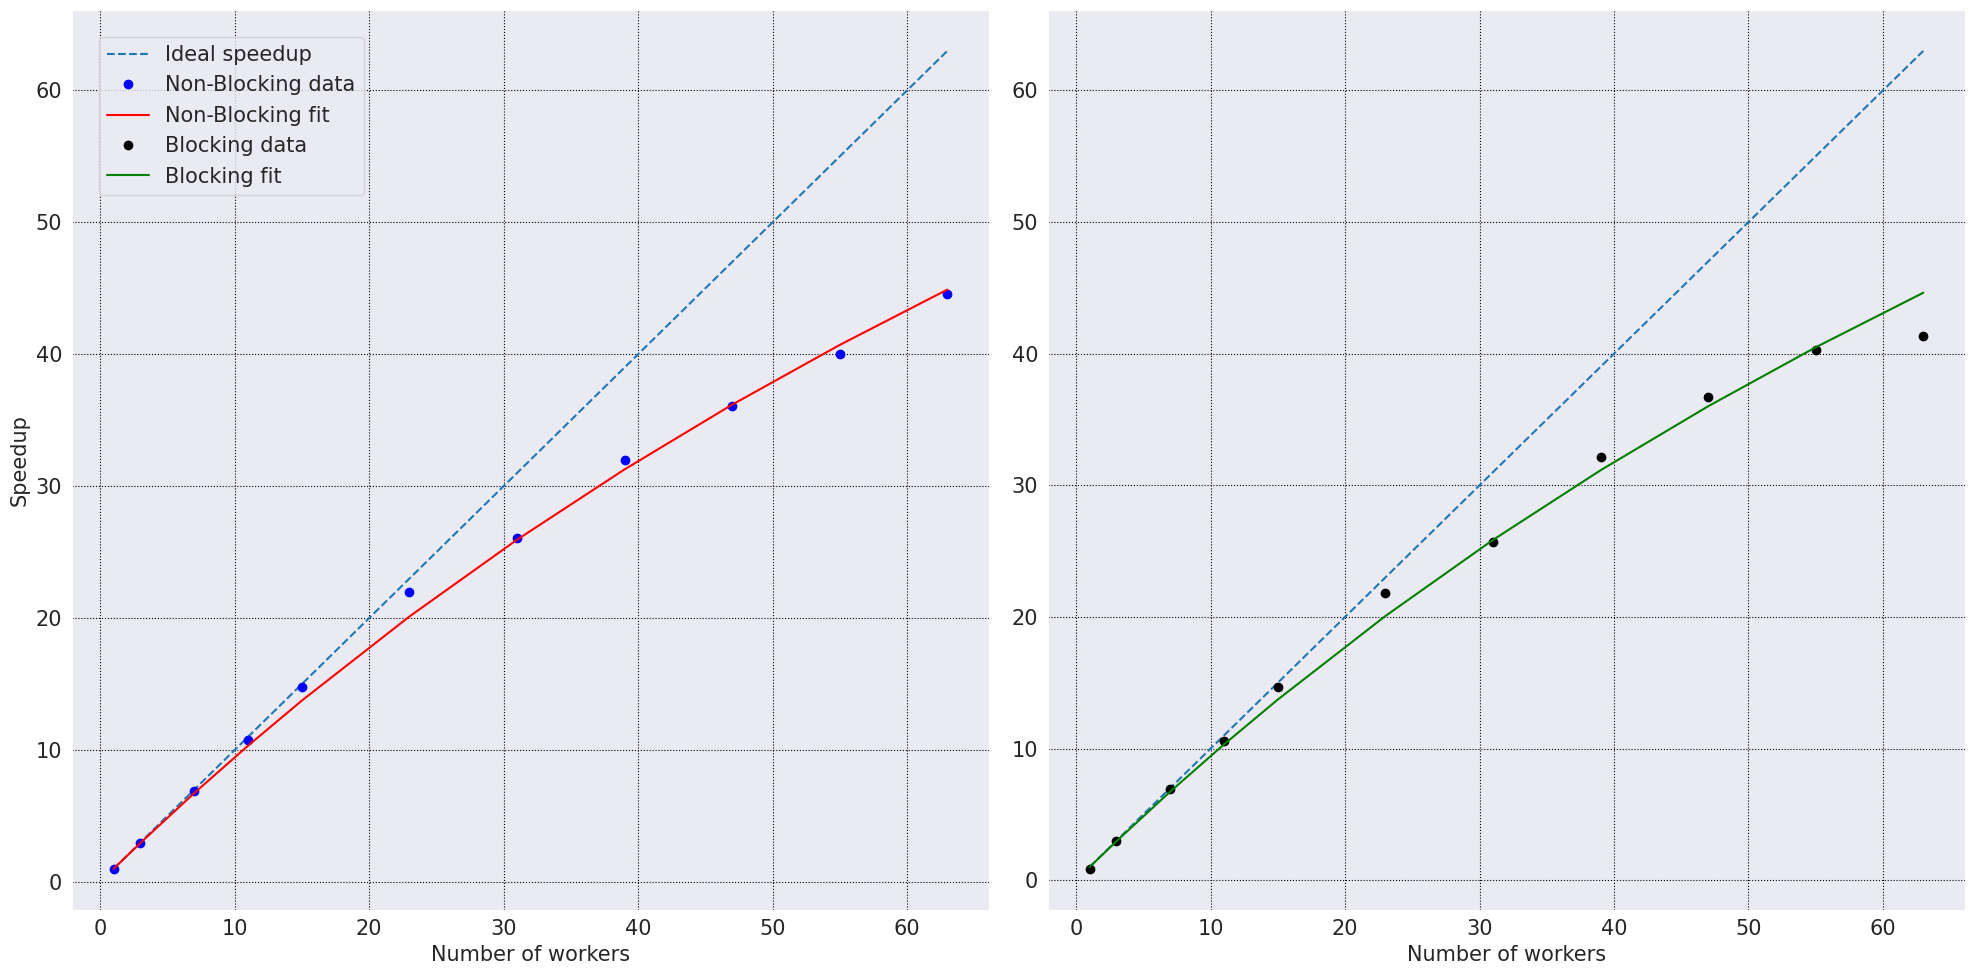

In [160]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].plot(x,x,'--',label="Ideal speedup")
ax[1].plot(x,x,'--')
ax[0].plot(x, seq_time/(nb_arr[0]),'o',label='Non-Blocking data', color = 'blue')
ax[1].plot(x, seq_time/(b_arr[0]),'o',label='Blocking data', color = 'black')
ax[0].plot(x,ahmdalslaw(x,993.50e-3),'-',color="RED",label='Non-Blocking fit')
ax[1].plot(x,ahmdalslaw(x,993.36e-3),'-',color="GREEN",label='Blocking fit')
ax[0].set_xlabel('Number of workers')
ax[1].set_xlabel('Number of workers')
ax[0].set_ylabel("Speedup")
fig.legend(loc=(0.05,0.8))
fig.tight_layout()
plt.savefig('graph.eps',dpi=192)
plt.show()